# Fill Missing Values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
dates = pd.read_excel("./data/electricityData.xlsx", sheet_name="dates", header=None, converters={0: pd.to_datetime})
usage = pd.read_excel("./data/electricityData.xlsx", sheet_name="usage", header=None)

usage

,0,1,2,3
0,3078100.0,2016100.0,2425400.0,7770200.0
1,2660700.0,2032600.0,2664500.0,7620100.0
2,2319400.0,1870300.0,2478800.0,6905400.0
3,2173000.0,1882700.0,2541300.0,6835700.0
4,2028400.0,1901300.0,2540600.0,6714600.0
...,...,...,...,...
310,3079400.0,3464700.0,2545900.0,9110300.0
311,3581700.0,3429430.0,2449100.0,9480300.0
312,4219200.0,3559200.0,2460900.0,10260000.0
313,3997000.0,3563400.0,2561800.0,10145000.0


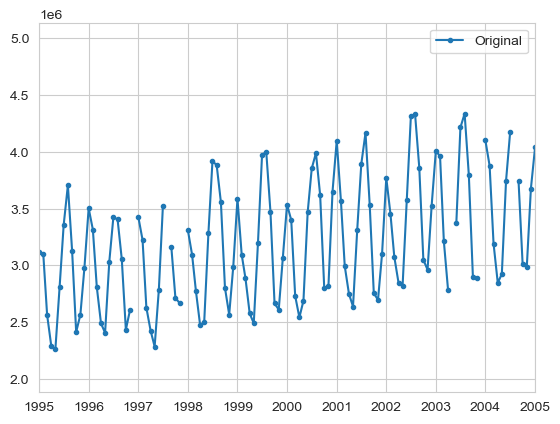

In [3]:
plt.figure()
plt.plot(dates, usage.iloc[:, 0], marker='.')
plt.xlim([pd.to_datetime("1995"), pd.to_datetime("2005")])
plt.legend(["Original"])
plt.show()

In [4]:
usage_filled = pd.DataFrame(usage).interpolate(axis=0)
usage_filled

,0,1,2,3
0,3078100.0,2016100.0,2425400.0,7770200.0
1,2660700.0,2032600.0,2664500.0,7620100.0
2,2319400.0,1870300.0,2478800.0,6905400.0
3,2173000.0,1882700.0,2541300.0,6835700.0
4,2028400.0,1901300.0,2540600.0,6714600.0
...,...,...,...,...
310,3079400.0,3464700.0,2545900.0,9110300.0
311,3581700.0,3429430.0,2449100.0,9480300.0
312,4219200.0,3559200.0,2460900.0,10260000.0
313,3997000.0,3563400.0,2561800.0,10145000.0


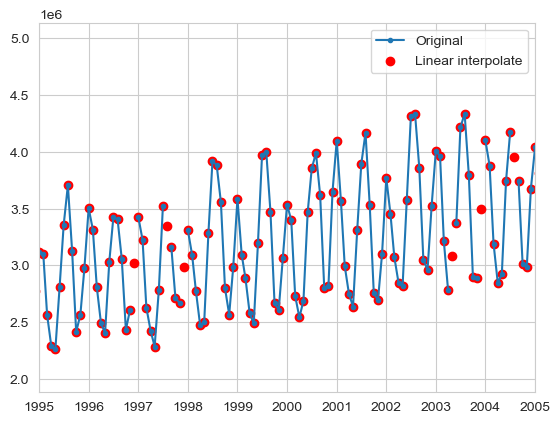

In [5]:
plt.figure()
plt.plot(dates, usage.iloc[:, 0], marker='.')
plt.scatter(dates.to_numpy(), usage_filled.iloc[:, 0].to_numpy(), color='red')
plt.xlim([pd.to_datetime("1995"), pd.to_datetime("2005")])
plt.legend(["Original", "Linear interpolate"])
plt.show()

In [6]:
usage_filled_cube = pd.DataFrame(usage).interpolate(axis=0, method='pchip')
usage_filled_cube

,0,1,2,3
0,3078100.0,2.016100e+06,2425400.0,7770200.0
1,2660700.0,2.032600e+06,2664500.0,7620100.0
2,2319400.0,1.870300e+06,2478800.0,6905400.0
3,2173000.0,1.882700e+06,2541300.0,6835700.0
4,2028400.0,1.901300e+06,2540600.0,6714600.0
...,...,...,...,...
310,3079400.0,3.464700e+06,2545900.0,9110300.0
311,3581700.0,3.429430e+06,2449100.0,9480300.0
312,4219200.0,3.559200e+06,2460900.0,10260000.0
313,3997000.0,3.563400e+06,2561800.0,10145000.0


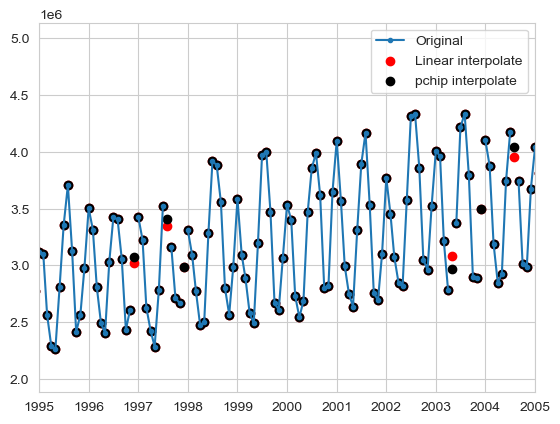

In [7]:
plt.figure()
plt.plot(dates, usage.iloc[:, 0], marker='.')
plt.scatter(dates.to_numpy(), usage_filled.iloc[:, 0].to_numpy(), color='red')
plt.scatter(dates.to_numpy(), usage_filled_cube.iloc[:, 0].to_numpy(), color='black')
plt.xlim([pd.to_datetime("1995"), pd.to_datetime("2005")])
plt.legend(["Original", "Linear interpolate", "pchip interpolate"])
plt.show()